# Homework 0: Linear Regression & Gradient Descent Algorithm


[https://github.com/thachkse/Intro-to-ML/tree/main/HW_0](https://github.com/thachkse/Intro-to-ML/tree/main/HW_0)

**Kim Thach** *800793249*

*ECGR 5060*



## Introduction 

The following code will provide the steps needed to perform a Linear Regression and  Gradient Descent on a dataset. Please visit the link above to view the source code, files and any additional documentation related to this Homework.



In [15]:
# First import all needed libraries

import numpy as np              # Arrays
import pandas as pd             
import matplotlib.pyplot as plt # Plotting


## Functions

The following functions below will be used for both problems 1 and 2.

* The `compute_cost()` function will be used to calculate the loss of the exploratory variables relative to the output value `y`. 
* The `gradient_descent()` function will iterate through each sample / row in the dataset and determine & store the loss for each row.


### Compute cost for linear regression

In [16]:
# Training Loop

def compute_cost(X,y,theta):
    
    """ 
    Compute cost for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
        m= number of training examples
        n= number of features (including x0 column of ones)
    y: 1D array of labels/target value for each training example. Dimension (1 x m)

    theta :  1D array of fitting paramenters or weights. Dimension (1 x n)

    Output Parameters
    ----------------
    J: Scalar value.
    """

    predictions = X.dot(theta)
    errors = np.subtract(predictions,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    
    return J


### Gradient Descent

In [17]:
def gradient_descent(X,y,theta,alpha,iterations):

    cost_hist = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_hist[i] = compute_cost(X,y,theta)

    return theta, cost_hist
    

## Problem 1

Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

* Report the linear model you found for each explanatory variable.
* Plot the final regression model and loss over the iteration per each explanatory variable.

* **Which explanatory variable has the lower loss (cost) for explaining the output (Y)?**

* **Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.**

In [18]:
# Read in CSV file
# The CSV file should be contained in the same working directory
# The original CSV file was edited to include headers, so all values may be extracted from the dataframe. 

df = pd.read_csv('D3_2.csv')

#Let's check out the first 5 rows of our dataset

print(df.head())
print(len(df))

         x1        x2        x3        x4
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375
100


In [19]:
# Define explanatory variables (First 3 columns).

x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]

# The fourth column is the dependent variable.
y = df.values[:,3]

# Determine the number of samples in the array for the different variables.
m = len(y)
print(m)

100


### Training 1

Use exploratory variables x1 / data found in column 1. The following parameters are used in this dataset:

* Initially define parameters (`theta`) as 0 
    * This training set includes a single feature, so it only has 2 parameters.
* No. of interations (`iterations`) = 1500
* Learning rate (`alpha`) = 0.01


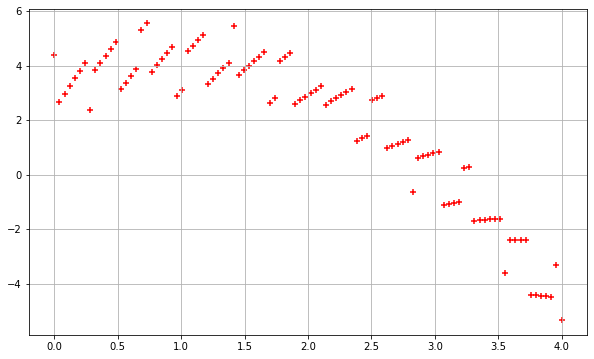

In [20]:
# Plot the original dataset.
plt.figure()
plt.scatter(x1,y,color='red',marker='+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)

# Create a vector of ones

x0=np.ones((m,1))

# Reshape the vector into a [1 x m] vector vs. the original [m x 1] to later stack

x_1=x1.reshape(m,1)

# Stack the 2 vectors side by side.

X=np.hstack((x0,x_1))

# Set the number of parameters in your model

theta=np.zeros(2)



The cost for given values of theta_0 and theta_1=  5.524438459185473
Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


Text(0.5, 1.0, 'Convergence of gradient descent')

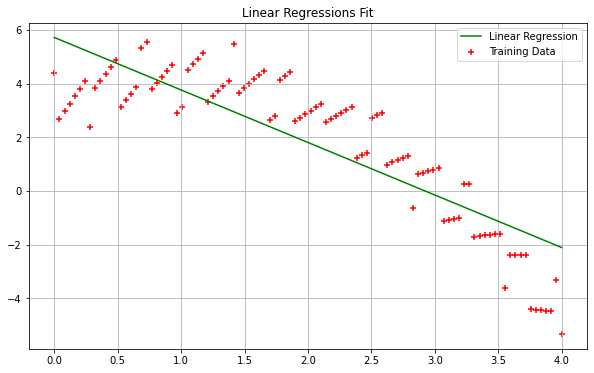

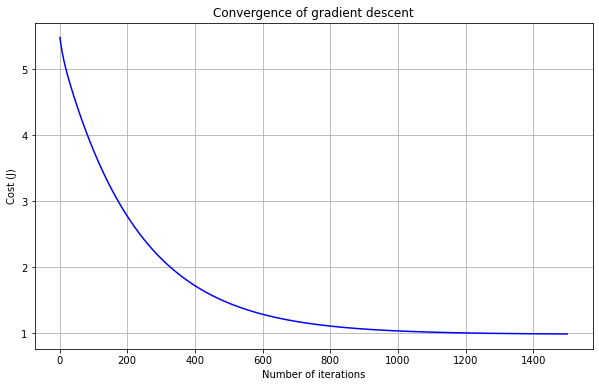

In [21]:
cost = compute_cost(X,y,theta)
print('The cost for given values of theta_0 and theta_1= ', cost)

theta = [0,0]
iterations = 1500
iter1 = 1500
alpha = 0.01

theta, cost_hist1 = gradient_descent(X,y,theta,alpha,iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_hist1)


plt.figure()
plt.scatter(X[:,1],y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()

plt.figure()
plt.plot(range(1,iterations+1),cost_hist1,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

### Training 2


* Initially define parameters (`theta`) as 0 
    * This training set includes a single feature, so it only has 2 parameters.
* No. of interations (`iterations`) = 1000
* Learning rate (`alpha`) = 0.09

The cost for given values of theta_0 and theta_1=  5.524438459185473
Final value of theta = [0.73606043 0.55760761]


Text(0.5, 1.0, 'Convergence of gradient descent')

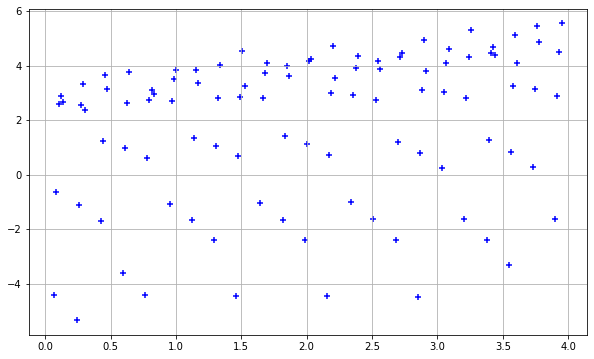

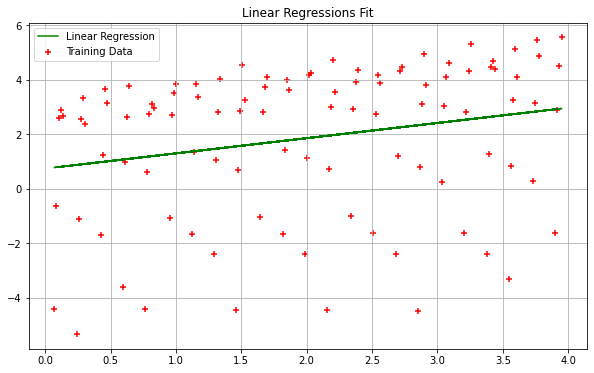

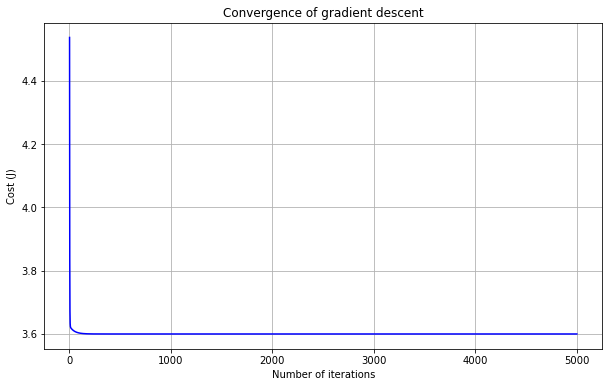

In [22]:
# Parameters and values related to x1
plt.figure()
plt.scatter(x2,y,color='blue',marker='+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)

# Create a vector of ones

x0=np.ones((m,1))

# Reshape the vector into a [1 x m] vector vs. the original [m x 1] to later stack

x_2=x2.reshape(m,1)

# Stack the 2 vectors together

X=np.hstack((x0,x_2))

# Set the number of parameters in your model

theta=np.zeros(2)

cost = compute_cost(X,y,theta)
print('The cost for given values of theta_0 and theta_1= ', cost)

theta = [0,0]
iterations = 5000
iter2 = 5000
alpha = 0.05

theta, cost_hist2 = gradient_descent(X,y,theta,alpha,iterations)
print('Final value of theta =', theta)
# print('cost_history =', cost_hist2)


plt.figure()
plt.scatter(X[:,1],y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()

plt.figure()
plt.plot(range(1,iterations+1),cost_hist2,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

### Training 3


* Initially define parameters (`theta`) as 0 
    * This training set includes a single feature, so it only has 2 parameters.
* No. of interations (`iterations`) = 1000
* Learning rate (`alpha`) = 0.1

The cost for given values of theta_0 and theta_1=  5.524438459185473
Final value of theta = [ 2.8714221  -0.52048288]


Text(0.5, 1.0, 'Convergence of gradient descent')

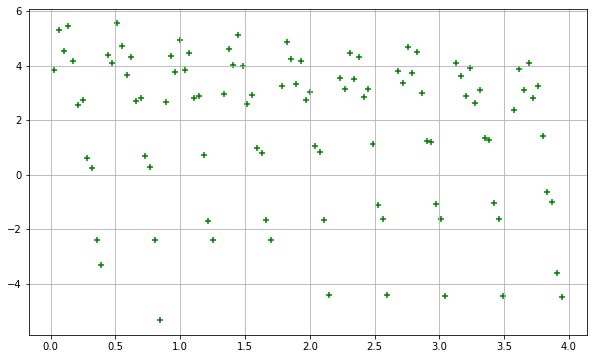

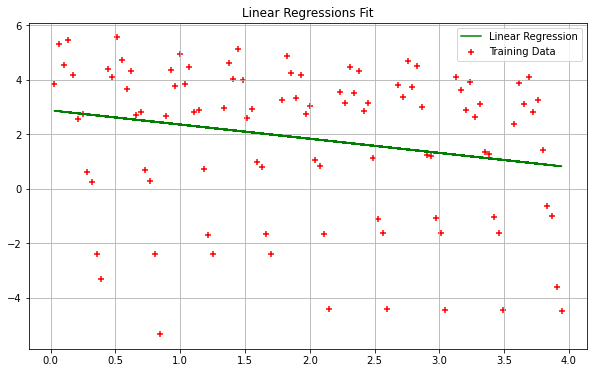

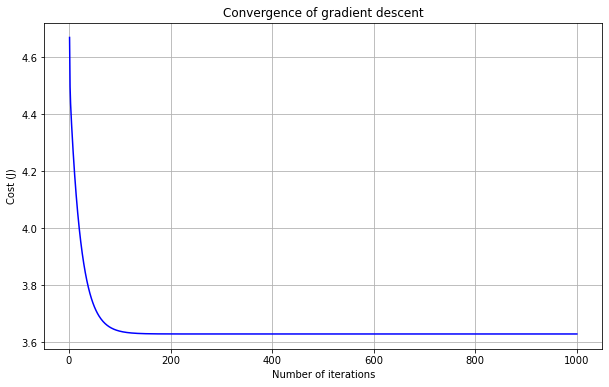

In [23]:
x3
# Parameters and values related to x1
plt.figure()
plt.scatter(x3,y,color='green',marker='+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)

# Create a vector of ones

x0=np.ones((m,1))

# Reshape the vector into a [1 x m] vector vs. the original [m x 1] to later stack

x_3=x3.reshape(m,1)

# Stack the 2 vectors together

X3=np.hstack((x0,x_3))

# Set the number of parameters in your model

theta=np.zeros(2)

cost = compute_cost(X,y,theta)
print('The cost for given values of theta_0 and theta_1= ', cost)

theta = [0,0]
iterations = 1000
iter3 = 1000
alpha = 0.1

theta, cost_hist3 = gradient_descent(X3,y,theta,alpha,iterations)
print('Final value of theta =', theta)
# print('cost_history =', cost_hist3)


plt.figure()
plt.scatter(X3[:,1],y,color='red',marker='+',label='Training Data')
plt.plot(X3[:,1],X3.dot(theta),color='green',label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()

plt.figure()
plt.plot(range(1,iterations+1),cost_hist3,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

Text(0.5, 1.0, 'Convergence of gradient descent')

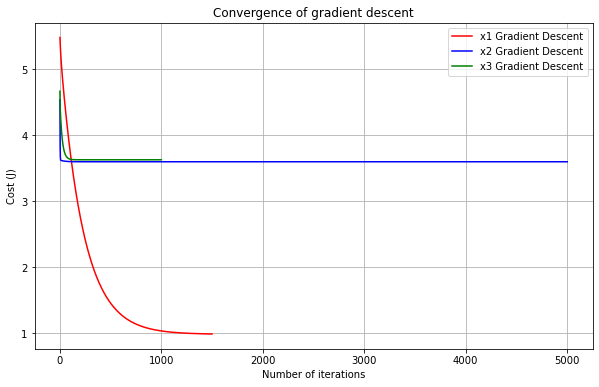

In [24]:
plt.figure()
plt.plot(range(1,iter1+1),cost_hist1,color='red',label='x1 Gradient Descent')
plt.plot(range(1,iter2+1),cost_hist2,color='blue',label='x2 Gradient Descent')
plt.plot(range(1,iter3+1),cost_hist3,color='green',label='x3 Gradient Descent')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.title('Convergence of gradient descent')

### Conclusion

* **Which explanatory variable has the lower loss (cost) for explaining the output (Y)?**

    * Exploratory variables `x1` has the lower loss (cost) because it had the best fit for the linear regression model compared to the other exploratory variables (`x2` & `x3`)

* **Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.**

    1. A finite learning rate, even paired with more iterations may take longer to converge. See `x1` in the plot above. It also garners the least loss in our training trials.
    2. A larger learning rate, with a relatively longer iterations can quickly arrive at a lower loss but can hinder discovery of convergence at the global loss for the training set
    3. A greater learning rate and smaller iterations can also converge quickly provide the same outcome as the stated above in response `2.`
    
    ### Summary
    
    |Variable|Iterations|Learning Rate|
    |--------|--------- |--------------|
    |x1| 1500 | 0.01 |
    |x2| 5000 | 0.05 |
    |x3| 1000 | 0.10 |
   



## Problem 2

This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

* Report the final linear model you found the best. 
* Plot loss over the iteration.
* Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.
* Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

Several parameters, organize parameters into a matrix....

[0. 0. 0. 0.]


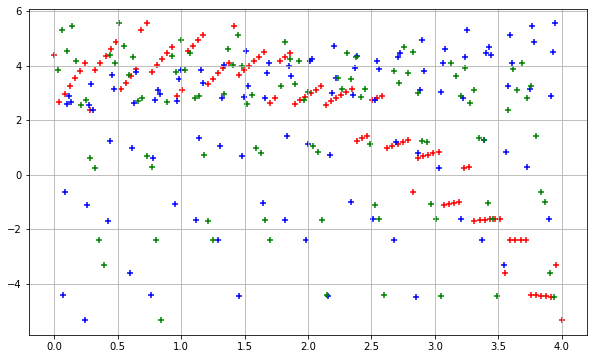

In [25]:
# Plotting the 3 different parameters in one figure.
plt.figure()
plt.scatter(x1,y,color='red',marker='+')
plt.scatter(x2,y,color='blue',marker='+')
plt.scatter(x3,y,color='green',marker='+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)

# Create a vector of ones

x0=np.ones((m,1))

# Reshape the vector into a [1 x m] vector vs. the original [m x 1] to later stack
x_1=x1.reshape(m,1)
x_2=x2.reshape(m,1)
x_3=x3.reshape(m,1)

# Stack the 2 vectors together

X=np.hstack((x0,x_1,x_2,x_3))

# Set the number of parameters in your model

theta=np.zeros(4)
print(theta)


The cost for given values of theta_0, theta_1, theta_2, theta_3=  5.524438459185473
Final value of theta = [ 5.0540181  -1.96696891  0.57555136 -0.2274693 ]


Text(0.5, 1.0, 'Convergence of gradient descent')

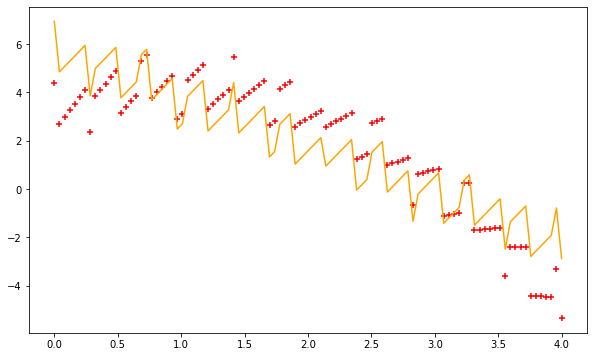

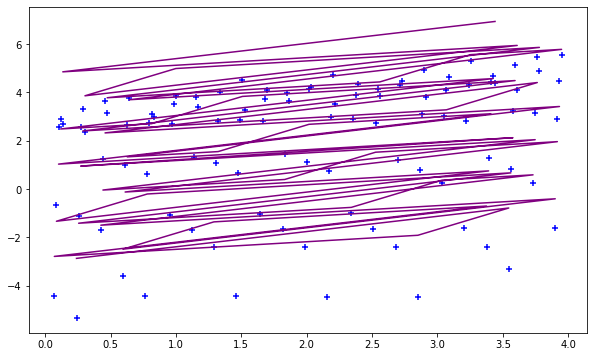

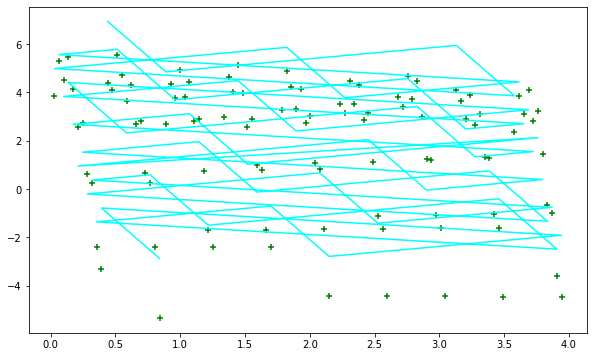

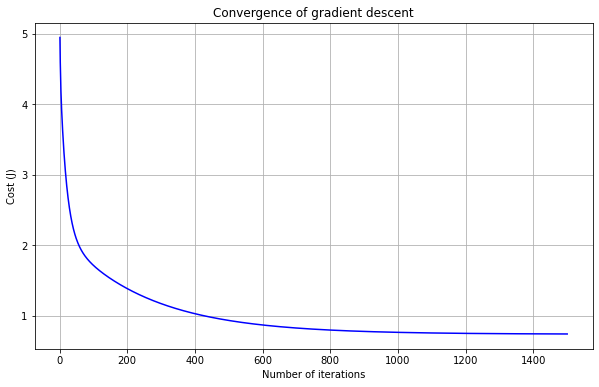

In [29]:
theta = [0,0,0,0]
iterations = 1500
alpha = 0.02

cost = compute_cost(X,y,theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3= ', cost)

theta, cost_hist = gradient_descent(X,y,theta,alpha,iterations)
print('Final value of theta =', theta)
#print('cost_history =', cost_hist)

plt.figure()
plt.scatter(X[:,1],y,color='red',marker='+',label='Stacked Data')
plt.plot(X[:,1],X.dot(theta),color='orange',label='Linear Regression')


plt.figure()
plt.scatter(X[:,2],y,color='blue',marker='+',label='Stacked Data')
plt.plot(X[:,2],X.dot(theta),color='purple',label='Linear Regression')

plt.figure()
plt.scatter(X[:,3],y,color='green',marker='+',label='Stacked Data')
plt.plot(X[:,3],X.dot(theta),color='cyan',label='Linear Regression')

plt.figure()
plt.plot(range(1,iterations+1),cost_hist,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

### Observations

The best linear model for this multivariable training set, was derived from the exploratory variable x1. 

Several different learning rates and iterations were used to determine the minimum loss possible. In the beginning the iterations were set to a large large number (5000) and the learning rates were incrementally dcreased in steps of .02 starting from 0.1. With the reduction of the learning rates still converged fairly quickly in a short amount of iterations. Next observation included lowering the number of iterations (1500) and once again adjusting the learning rates incrementally downward in the same manner as before.  The most values used for convergence and minimal loss was a learning rate of 0.02 and 1500 iterations.

In [28]:
# Prediction Using model to predict for the new values 
# Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

Xnew = np.array([1,1,1,1])
Xnew2 = np.array([1,2,0,4])
Xnew3 = np.array([1,3,2,1])


YPrediction1 = Xnew.dot(theta)
YPrediction2 = Xnew2.dot(theta)
YPrediction3 = Xnew3.dot(theta)

answerpre = [YPrediction1,YPrediction2,YPrediction3]
print(answerpre)

# The answers for the new values are available below as:
# [Set1, Set2, Set3]

[3.4351312521953563, 0.21020309047815322, 0.07674479906811082]


[github Link](https://github.com/thachkse/Intro-to-ML/tree/main/HW_0)